In [210]:
import matplotlib.pyplot as plt
import numpy as np

In [224]:
# zadane wartosci poczatkowe
y0 = 2
b = 10
x0 = 1
xn = 10
n1 = 40

In [225]:
# wartosc pochodnej
def f(x, y):
    return (x*y-y**2)/(x**2)

# wartosc funkcji
def f_exact(x):
    return 2*x/(2*np.log(x)+1)

In [226]:
# inicjalizacja dla przypadku przyblizonego
nn = np.zeros(shape=(n1+1, 1))
m = np.zeros(shape=(n1+1, 1))
k = np.zeros(shape=(n1+1, 1))
x = np.zeros(shape=(n1+1, 1))
x[0] = x0
nn[0] = y0
# krok
h = (b-x0)/n1

In [227]:
# Obliczanie kolejnych wartosci przypadku przyblizonego

for i in range(nn.shape[0]-1):
    m[i] = f(x[i], nn[i])
    k[i] = f(x[i] + 0.5*h, nn[i]+0.5*h*m[i])
    nn[i+1] = nn[i] + h*k[i]
    x[i+1] = x[i] + h

In [228]:
# Obliczanie dokladnych wartosci funkcji ze wzoru

y_exact = [f_exact(item) for item in x]

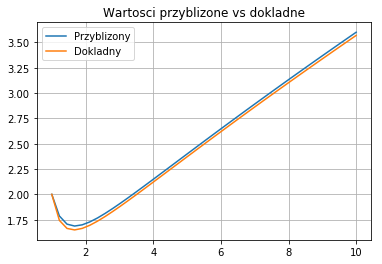

In [229]:
# Wykres dwoch przypadkow

plt.plot(x, nn, label='Przyblizony')
plt.plot(x, y_exact, label='Dokladny')
plt.legend()
plt.grid()
plt.title('Wartosci przyblizone vs dokladne')
plt.savefig(r'C:\Users\Wojtek\Dropbox\Doktorat\Doktorat Zajecia\Morric\przyblizone_vs_dokladne.png')

In [230]:
# Obliczanie bledow bezwzglednych
error = abs(nn - y_exact)

In [231]:
# Obliczanie bledu maksymalnego oraz sredniego
mean_error = np.mean(error)
max_error = np.max(error)

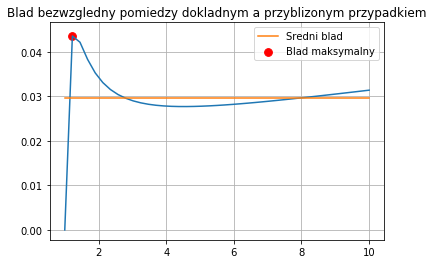

In [232]:
# bledu bezwzglednego wraz z wartosciami maksymalnego oraz sredniego
plt.plot(x, error)
plt.title('Blad bezwzgledny pomiedzy dokladnym a przyblizonym przypadkiem')
plt.scatter(x[np.argmax(error)], error[np.argmax(error)], color='red', s=60, label='Blad maksymalny')
plt.plot(x, np.ones(x.shape)*mean_error, label='Sredni blad')
plt.legend()
plt.grid()
plt.savefig(r'C:\Users\Wojtek\Dropbox\Doktorat\Doktorat Zajecia\Morric\bledy.png')